In [1]:
%load_ext autoreload
%autoreload 2
from pathlib import Path
import pandas as pd
import trimesh
import random
import sys

sys.path.append(str(Path("..").resolve()))
from src import *

# Regenerate the UV Maps

##### ℹ️ This notebook requires ShapeNetCore models in the `.shapenet/` root folder. It also requires the `statistics.parquet`.

The dataset produced so far in `data/dataset` is quite poor. The UV maps often lack interesting patterns that may help ControlNet to guide the diffusion process.

In this notebook we ask if we can regenerate the UV Maps using Blender _Smart UV Project_ function, while preserving the effective texture mapping.

In [2]:
dataset = ShapeNetCoreDataset3D()
stats = dataset.statistics
uids = stats[(stats["valid"])].index

In [3]:
UID = uids[random.randint(0, len(uids) - 1)]
UID="7dd57384aa290a835821cea205f2a4bb"
print(UID)
obj = dataset[UID]
# trimesh.load(obj.path).show()

7dd57384aa290a835821cea205f2a4bb


1it [00:00, 1853.43it/s]

Data are loaded, start creating Blender stuff
glTF import finished in 0.00s
Info: Removed 668 vertice(s)


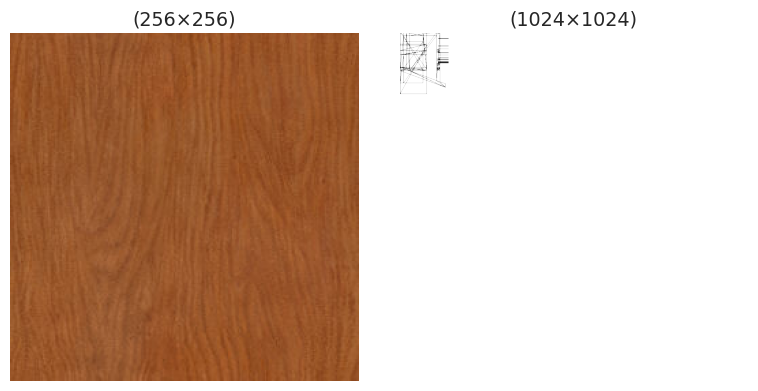

In [6]:
tex, uv = obj.textures[0], obj.draw_uv_map()
plot_images([tex, uv], cols=2, size=4)

Fra:1 Mem:26.15M (Peak 26.15M) | Time:485417:04:54.40 | Mem:0.00M, Peak:0.00M | Scene | Synchronizing object | model_normalized.obj
Fra:1 Mem:26.18M (Peak 26.18M) | Time:485417:04:54.40 | Mem:0.00M, Peak:0.00M | Scene | Initializing
Fra:1 Mem:26.18M (Peak 26.18M) | Time:485417:04:54.40 | Mem:0.00M, Peak:0.00M | Scene | Updating Images | Loading BakedTexture
Fra:1 Mem:26.18M (Peak 26.18M) | Time:485417:04:54.40 | Mem:0.00M, Peak:0.00M | Scene | Updating Images | Loading Image_0
Info: Baking map saved to internal image, save it externally or pack it


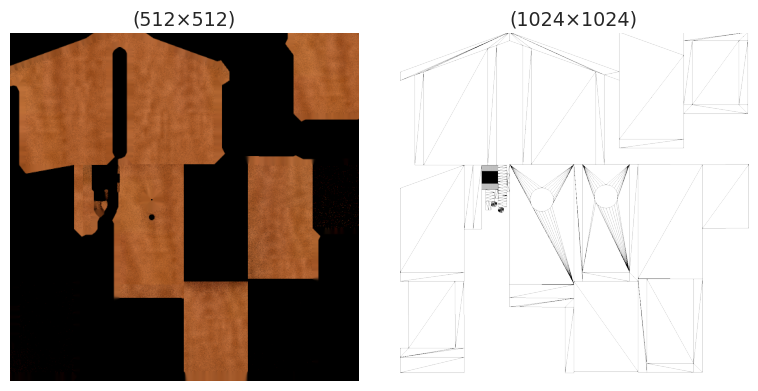

In [7]:
new_tex, new_uv = obj.regenerate_uv_map()
plot_images([new_tex, new_uv], cols=2, size=4)

In [ ]:
renderings = obj.render(views=4)

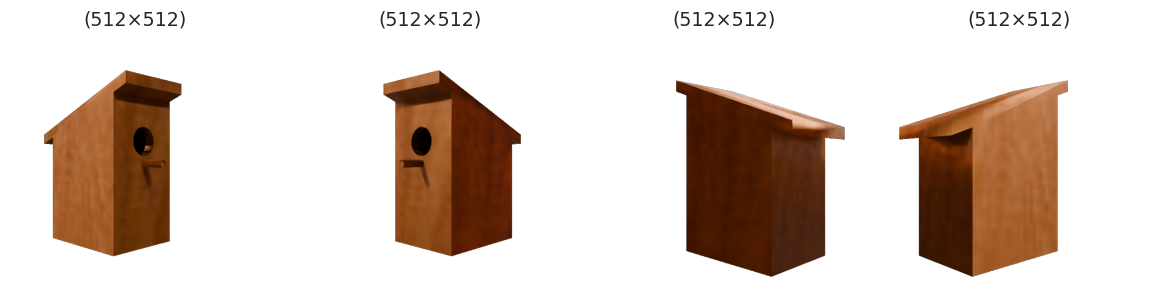

In [9]:
plot_images(renderings,size=3)